In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [434]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 100)

In [435]:
df1 = pd.read_csv('./application_data.csv') # Write your code for importing the csv file here
# df2 = pd.read_csv('./previous_application.csv') # Write your code for importing the csv file here

# Load and display shape of data

In [436]:
df1.shape

(307511, 122)

In [437]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# show all column info

In [438]:
# Display all columns with datatypes
df1.info(max_cols=125)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

# Remove Column more then 50% null, also drop unused column

In [439]:
# Remove Columns which are more then 40% of null values
df1 = df1.loc[:, df1.isnull().mean() < .5]

# Remove unused column
df1.drop(['FLAG_EMAIL','FLAG_PHONE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
         'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
         'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
         'LIVE_CITY_NOT_WORK_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
         'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE',
         'EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis=1, inplace=True)




# Impute the columns with 'Mode' value

In [440]:
# impute Rows
mode_value1 = df1.NAME_TYPE_SUITE.mode()[0]
df1['NAME_TYPE_SUITE'].fillna(mode_value1, inplace=True)
df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.mode()[0], inplace=True)
df1.OCCUPATION_TYPE.fillna('Blank Occupation', inplace=True)
# Remove row
df1 = df1[~np.isnan(df1['EXT_SOURCE_3'])]

# Impute Row
df1['NAME_TYPE_SUITE'].fillna(df1.AMT_GOODS_PRICE.mode()[0], inplace=True)

# Calucate Null % of columns

In [441]:
# Find the null value % of columns
round(df1.isnull().mean() *100, 2)
# df1.columns

SK_ID_CURR              0.00
TARGET                  0.00
NAME_CONTRACT_TYPE      0.00
CODE_GENDER             0.00
FLAG_OWN_CAR            0.00
FLAG_OWN_REALTY         0.00
CNT_CHILDREN            0.00
AMT_INCOME_TOTAL        0.00
AMT_CREDIT              0.00
AMT_ANNUITY             0.00
AMT_GOODS_PRICE         0.09
NAME_TYPE_SUITE         0.00
NAME_INCOME_TYPE        0.00
NAME_EDUCATION_TYPE     0.00
NAME_FAMILY_STATUS      0.00
NAME_HOUSING_TYPE       0.00
DAYS_BIRTH              0.00
DAYS_EMPLOYED           0.00
DAYS_REGISTRATION       0.00
DAYS_ID_PUBLISH         0.00
FLAG_MOBIL              0.00
OCCUPATION_TYPE         0.00
CNT_FAM_MEMBERS         0.00
REGION_RATING_CLIENT    0.00
ORGANIZATION_TYPE       0.00
EXT_SOURCE_2            0.00
EXT_SOURCE_3            0.00
FLAG_DOCUMENT_2         0.00
dtype: float64

# Change data type of the Target Column

In [442]:
# change data type
df1.TARGET = df1.TARGET.astype(object)
# print(df1.CNT_CHILDREN.value_counts())
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246546 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            246546 non-null  int64  
 1   TARGET                246546 non-null  object 
 2   NAME_CONTRACT_TYPE    246546 non-null  object 
 3   CODE_GENDER           246546 non-null  object 
 4   FLAG_OWN_CAR          246546 non-null  object 
 5   FLAG_OWN_REALTY       246546 non-null  object 
 6   CNT_CHILDREN          246546 non-null  int64  
 7   AMT_INCOME_TOTAL      246546 non-null  float64
 8   AMT_CREDIT            246546 non-null  float64
 9   AMT_ANNUITY           246535 non-null  float64
 10  AMT_GOODS_PRICE       246336 non-null  float64
 11  NAME_TYPE_SUITE       246546 non-null  object 
 12  NAME_INCOME_TYPE      246546 non-null  object 
 13  NAME_EDUCATION_TYPE   246546 non-null  object 
 14  NAME_FAMILY_STATUS    246546 non-null  object 
 15  

# Rename the columns and Treat the columns values

In [443]:
# Change the column name and convert data into year.
df1.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH","DAYS_EMPLOYED": "YEARS_EMPLOYED",
                    "DAYS_EMPLOYED": "YEARS_EMPLOYED", "DAYS_REGISTRATION":'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},
           inplace=True)

df1.YEARS_BIRTH = df1.YEARS_BIRTH.apply(lambda x: abs(x//365))
df1.YEARS_EMPLOYED = df1.YEARS_EMPLOYED.apply(lambda x: abs(x//365))
df1.YEARS_REGISTRATION = df1.YEARS_REGISTRATION.apply(lambda x: abs(x//365))
df1.YEARS_ID_PUBLISH = df1.YEARS_ID_PUBLISH.apply(lambda x: abs(x//365))

df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,26,2,10.0,6,1,Laborers,1.0,2,Business Entity Type 3,0.262949,0.139376,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,53,1,12.0,7,1,Laborers,1.0,2,Government,0.555912,0.729567,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,47,5,14.0,2,1,Laborers,2.0,2,Other,0.354225,0.621226,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,38,9,4.0,2,1,Accountants,3.0,2,Business Entity Type 3,0.724000,0.492060,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,52,2,13.0,7,1,Managers,2.0,3,Other,0.714279,0.540654,0


# Define the Target column % based on 0(Non-Defaulter) and 1(Defaulter)

In [444]:
round(df1.TARGET.value_counts()/len(df1.index), 2) * 100

0    92.0
1     8.0
Name: TARGET, dtype: float64

# Plot Target and see the Visualization of Defaulter and non-defaulter

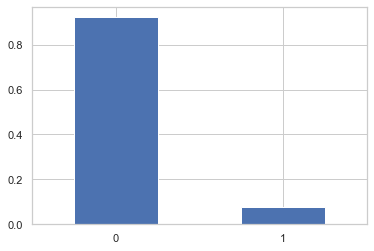

In [445]:
df1.TARGET.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()
# Defaulter are very few.

# Create two DF based on Target column

In [446]:
# defaulted_df 
target1_df = df1[df1.TARGET == 1]

# not_defaulted_df
target0_df = df1[df1.TARGET == 0]
target1_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,26,2,10.0,6,1,Laborers,1.0,2,Business Entity Type 3,0.262949,0.139376,0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,52,8,19.0,6,1,Cooking staff,1.0,3,Business Entity Type 3,0.548477,0.190706,0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,48,4,4.0,3,1,Laborers,2.0,2,Business Entity Type 3,0.306841,0.320163,0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,37,10,1.0,13,1,Sales staff,2.0,3,Self-employed,0.674203,0.399676,0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,68,1000,15.0,12,1,Blank Occupation,2.0,2,XNA,0.023952,0.720944,0


# Defaulter People Analysis with Target '1'
- Based on age group more defaulter.
- Defaulter based on family status
- Credit amount and Age outliers
- Which type suite is more defaulter
- Which income type is more defaulter
- Combine suite type/Income type with Grapth
- Outlier between Total income and Credit
- Which Contract(LOAN) type is more defaulter
- Male are more defaulter or female
- Which Contract Type is more defaulter between Genter M/F

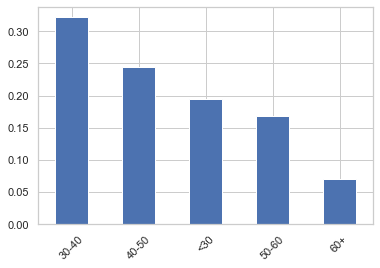

In [451]:
# Based on age group more defaulter.
target1_df['age_group'] = pd.cut(target1_df.YEARS_BIRTH, [0,30,40,50,60,999], labels=['<30', '30-40', '40-50', '50-60', '60+'])
target1_df.age_group.value_counts(normalize=True)

target1_df.age_group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

# 30-40 age group peoples are more defaulter.

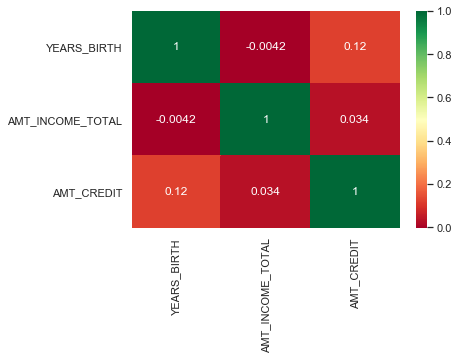

In [458]:
# Combine heatmap with age/total income and balance with Grapth
sns.heatmap(target1_df[['YEARS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr(), annot=True, cmap='RdYlGn')
plt.show()


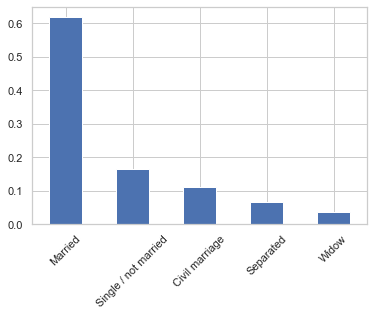

In [428]:
# Defaulter based on family status
target1_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

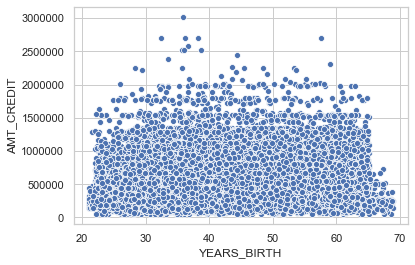

In [427]:
# Credit amount and Age outliers
sns.scatterplot(x="YEARS_BIRTH", y="AMT_CREDIT", data=target1_df)
plt.show()

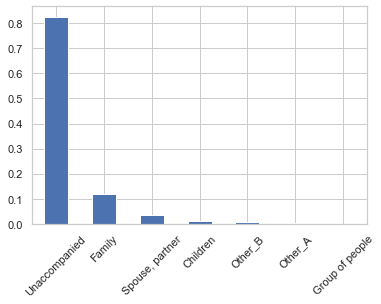

In [384]:
# Which type suite is more defaulter
target1_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# Found that mostly "Unaccompanied" is more defaulter

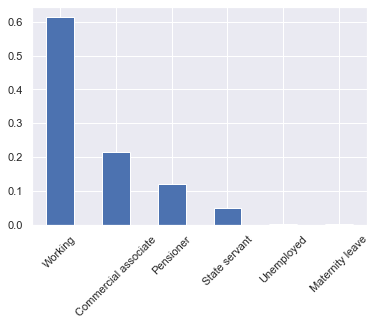

In [350]:
# Which income type is more defaulter
target1_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# Found that mostly "workings" are defaulter

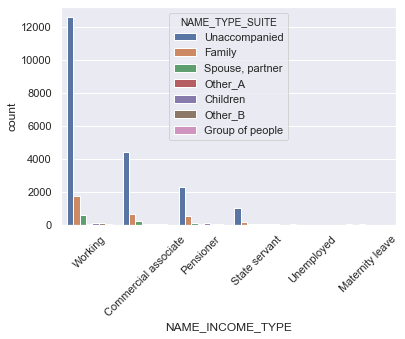

In [351]:
# Combine suite type/Income type with Grapth
sns.countplot(x = "NAME_INCOME_TYPE", hue= 'NAME_TYPE_SUITE', data = target1_df)
plt.xticks(rotation=45)
plt.show()

# People who are working and income type is "Unaccompanied". those are more defaulter.

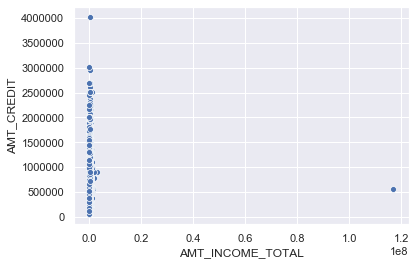

In [352]:
# Outlier between Total income and Credit
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=target1_df)
plt.show()
# Outlier between income and credit

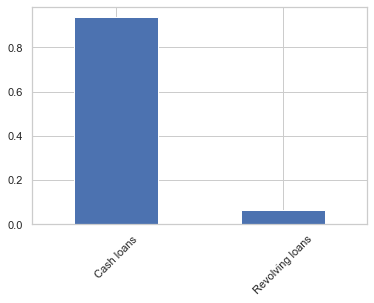

In [385]:
# Which Contract(LOAN) type is more defaulter
target1_df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

# Cash Loans type are more defaulter then Revolving Loans


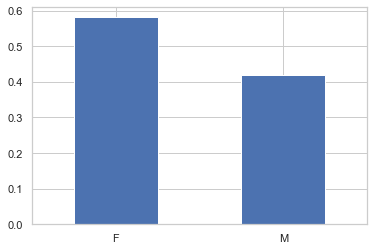

In [408]:
# Male are more defaulter or female
target1_df.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()

# More Loan has been taken by Female.

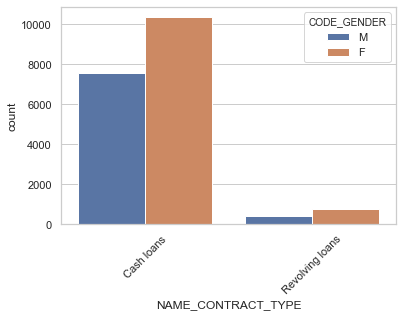

In [386]:
# Which Contract Type is more defaulter between Genter M/F
sns.countplot(x = "NAME_CONTRACT_TYPE", hue= 'CODE_GENDER', data = target1_df)
plt.xticks(rotation=45)
plt.show()

# As we can see Cash loans and Revolving Loans both have More Female defaulter.

# Non Defaulter Analysis, Where Target is '0'
- Based on age group more defaulter.
- Non-Defaulter based on family status
- Credit amount and Age outliers
- Which type suite is more defaulter
- Which income type is more defaulter
- Combine suite type/Income type with Grapth
- Outlier between Total income and Credit
- Which Contract(LOAN) type is more defaulter
- Male are more defaulter or female
- Which Contract Type is more non-defaulter between Genter M/F

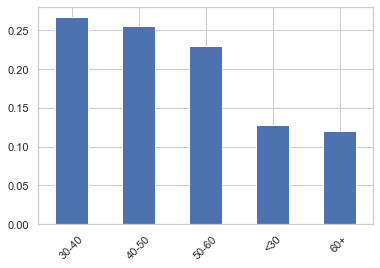

In [460]:
# Based on age group more defaulter.
target0_df['age_group'] = pd.cut(target0_df.YEARS_BIRTH, [0,30,40,50,60,999], labels=['<30', '30-40', '40-50', '50-60', '60+'])
target0_df.age_group.value_counts(normalize=True)

target0_df.age_group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

# 30-40 and 40-50 age group peoples are more non defaulter.

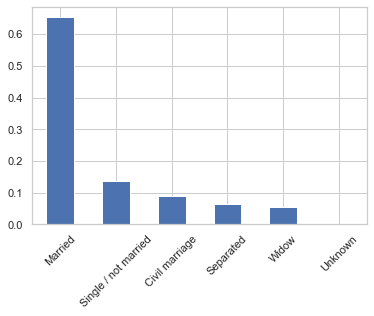

In [409]:
# Non-Defaulter based on family status
target0_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

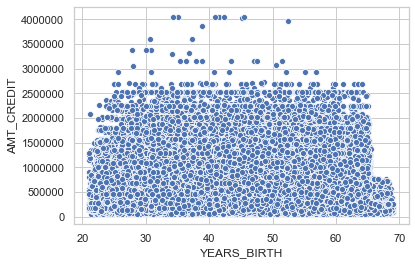

In [411]:
# Credit amount and Age outliers
sns.scatterplot(x="YEARS_BIRTH", y="AMT_CREDIT", data=target0_df)
plt.show()

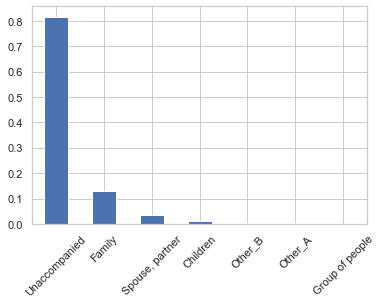

In [412]:
# Which type suite is more non-defaulter
target0_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

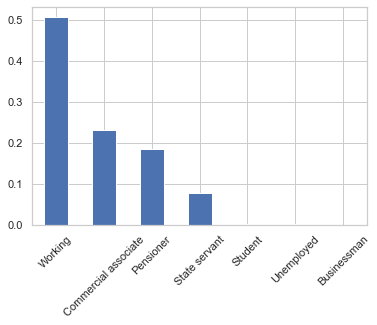

In [413]:
# Which income type is more non-defaulter
target0_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# Found that mostly "workings" are non-defaulter too

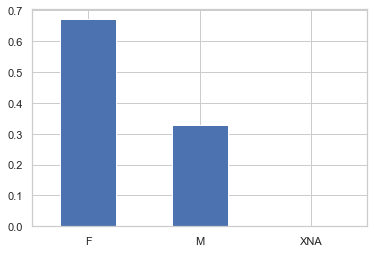

In [416]:
# Male are more non-defaulter or female
target0_df.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()
# More Loan has been taken by Female.

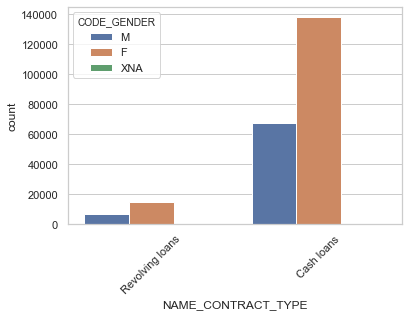

In [422]:
# Which Contract Type is more non-defaulter between Genter M/F
sns.countplot(x = "NAME_CONTRACT_TYPE", hue= 'CODE_GENDER', data = target0_df)
plt.xticks(rotation=45)
plt.show()
# As we can see Cash loans and Revolving Loans both have More Female non-defaulter.

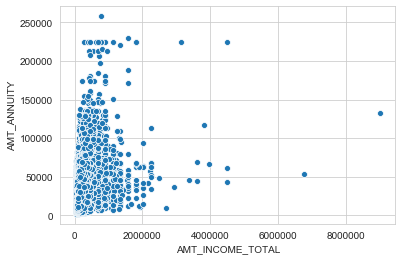

In [319]:
# Calculate the non-defulter total income and monthly EMI analysis.
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_ANNUITY", data=target0_df)
plt.show()

# Outlier between income and credit for not defaulter

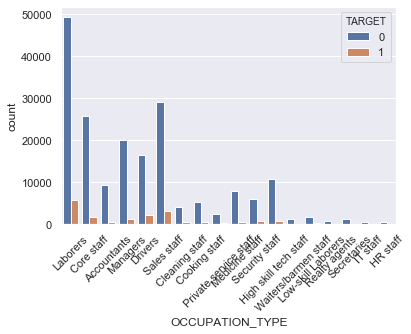

In [353]:
# Calculate the defulter and non-defaulter occupation based analysis.
sns.countplot(x = "OCCUPATION_TYPE", hue= 'TARGET', data = df1)
plt.xticks(rotation = 45)
plt.show()